# Implementing MLPs with Keras
# Classification

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.15.0


In [2]:
!pip show keras

Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
# create validation set
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [7]:
class_name = ["T-shirt/Top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_name[y_train[0]] #first image of training dataset

'Coat'

### Creating the model using the Sequential API

In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [10]:
# # Code examples
# from tensorflow.keras.layers import Dense
# output_layer = Dense(10)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.layers

In [13]:
hidden1 = model.layers[1]
hidden1

In [14]:
hidden1.name

'dense'

In [15]:
model.get_layer('dense') is hidden1

True

In [16]:
weights, biases = hidden1.get_weights()
print(weights)
print(len(weights))

[[-0.03545857  0.0112058   0.02051457 ... -0.02873053  0.0667693
   0.04571987]
 [ 0.06076278  0.04396585  0.06358822 ... -0.05408933  0.01985408
  -0.03455384]
 [-0.00643606 -0.01262343 -0.04124347 ... -0.06401969 -0.02947896
   0.04712763]
 ...
 [ 0.01793684 -0.04452568 -0.01348916 ... -0.02145585 -0.01797448
  -0.07209233]
 [ 0.06190848 -0.01207693 -0.04481224 ... -0.05316702  0.01431713
  -0.00995579]
 [-0.04963411 -0.02256058  0.06698789 ...  0.00389749  0.06632125
   0.02122215]]
784


In [17]:
weights.shape

(784, 300)

In [18]:
len(biases)

300

In [19]:
biases.shape

(300,)

### Compiling the model

In [20]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### Training abd evaluating the nodel

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 14s 8ms/step - loss: 0.7339 - accuracy: 0.7601 - val_loss: 0.5387 - val_accuracy: 0.8106
Epoch 2/30
1719/1719 [==============================] - 16s 10ms/step - loss: 0.4880 - accuracy: 0.8280 - val_loss: 0.4584 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4428 - accuracy: 0.8452 - val_loss: 0.4337 - val_accuracy: 0.8478
Epoch 4/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4158 - accuracy: 0.8537 - val_loss: 0.4069 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3951 - accuracy: 0.8607 - val_loss: 0.4061 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3800 - accuracy: 0.8666 - val_loss: 0.3816 - val_accuracy: 0.8662
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3671 - accuracy: 0.8707 - val_loss: 0.3715 - val_accur

In [22]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [23]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [24]:
history.history

{'loss': [0.7339178919792175,
  0.48802876472473145,
  0.442777544260025,
  0.4158053398132324,
  0.39506199955940247,
  0.37998658418655396,
  0.3670847415924072,
  0.35677570104599,
  0.3456985354423523,
  0.3355723023414612,
  0.32817673683166504,
  0.3207084834575653,
  0.31411242485046387,
  0.30753815174102783,
  0.30059748888015747,
  0.2951996624469757,
  0.289141982793808,
  0.2838799059391022,
  0.2778483033180237,
  0.2729751169681549,
  0.26814359426498413,
  0.2636396586894989,
  0.2580697536468506,
  0.2545970678329468,
  0.2501567602157593,
  0.24585135281085968,
  0.24198612570762634,
  0.23794108629226685,
  0.23404236137866974,
  0.2295876294374466],
 'accuracy': [0.7601090669631958,
  0.8280181884765625,
  0.8452181816101074,
  0.8536545634269714,
  0.8607454299926758,
  0.866636335849762,
  0.8707454800605774,
  0.8741454482078552,
  0.8776000142097473,
  0.8813090920448303,
  0.8831636309623718,
  0.8847636580467224,
  0.8875818252563477,
  0.8895454406738281,
  0.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.733918,0.760109,0.538703,0.8106
1,0.488029,0.828018,0.458415,0.8412
2,0.442778,0.845218,0.433724,0.8478
3,0.415805,0.853655,0.406893,0.8638
4,0.395062,0.860745,0.406105,0.8588


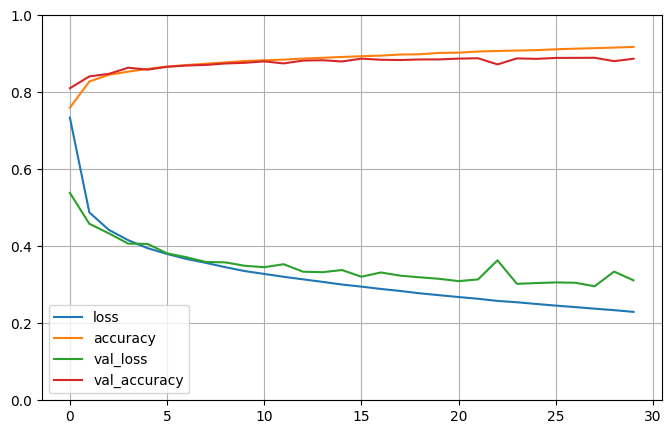

In [27]:
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [28]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 61.9825 - accuracy: 0.8550


[61.98248291015625, 0.8550000190734863]

### Make prediction

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 98ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
y_pred = model.predict_classes(X_new)

AttributeError: ignored

In [31]:
import numpy as np
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

1/1 [==============================] - 0s 34ms/step


array([9, 2, 1])

In [32]:
np.array(class_name)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [33]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)